Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Primeras 5 filas:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Resume

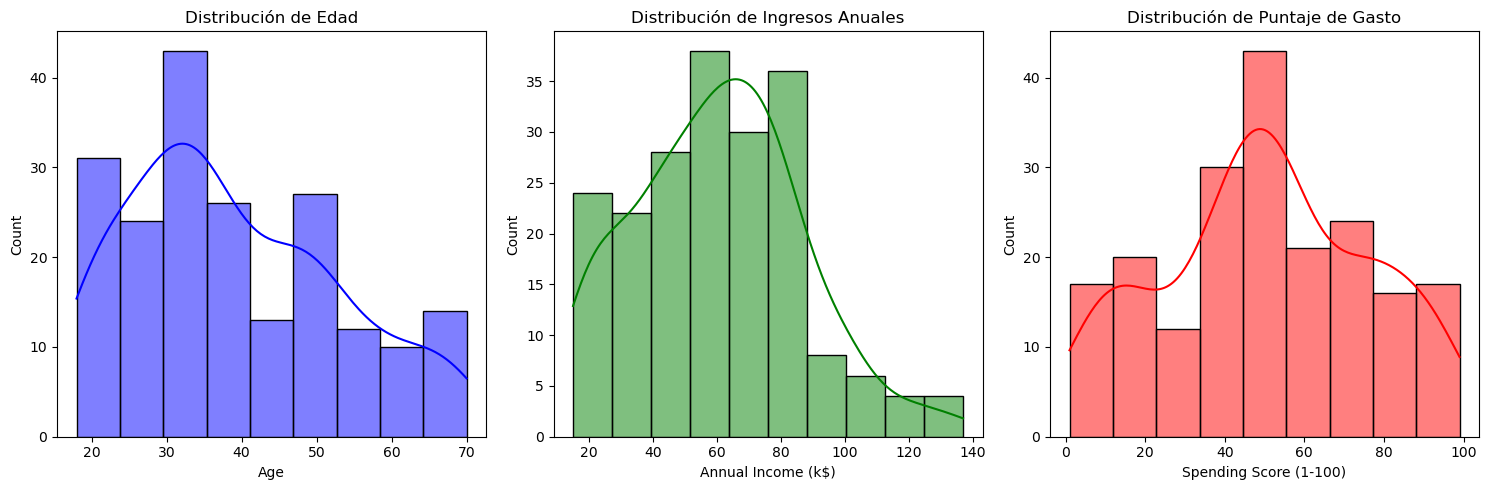

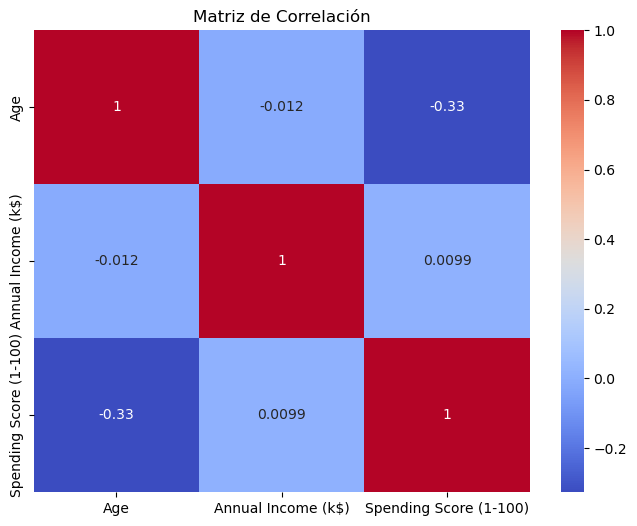

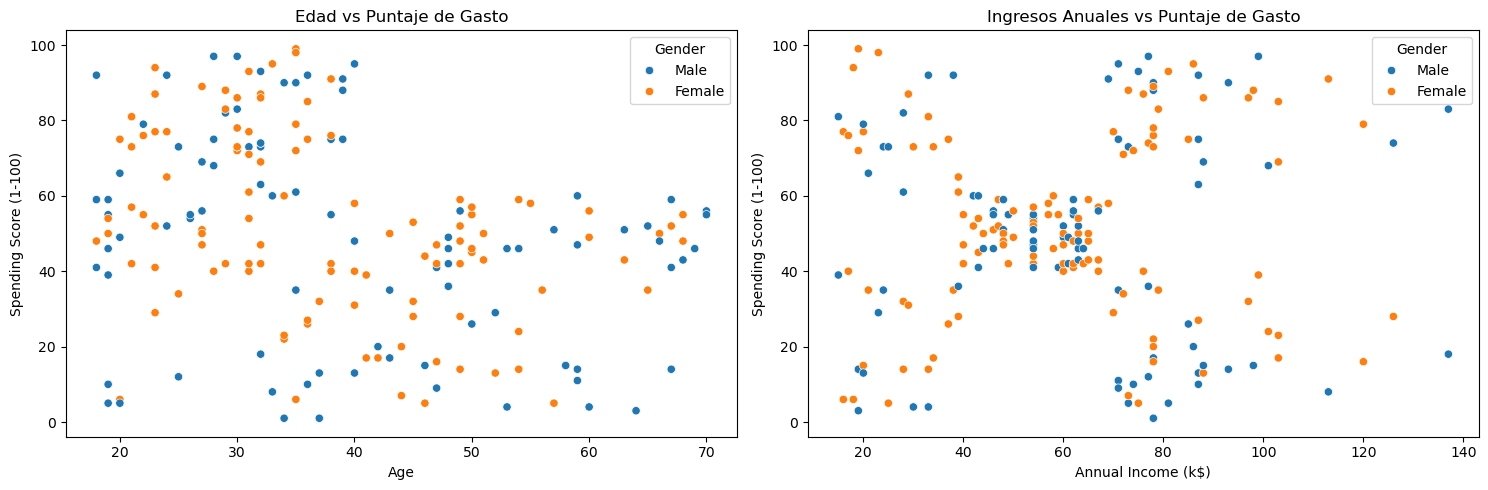

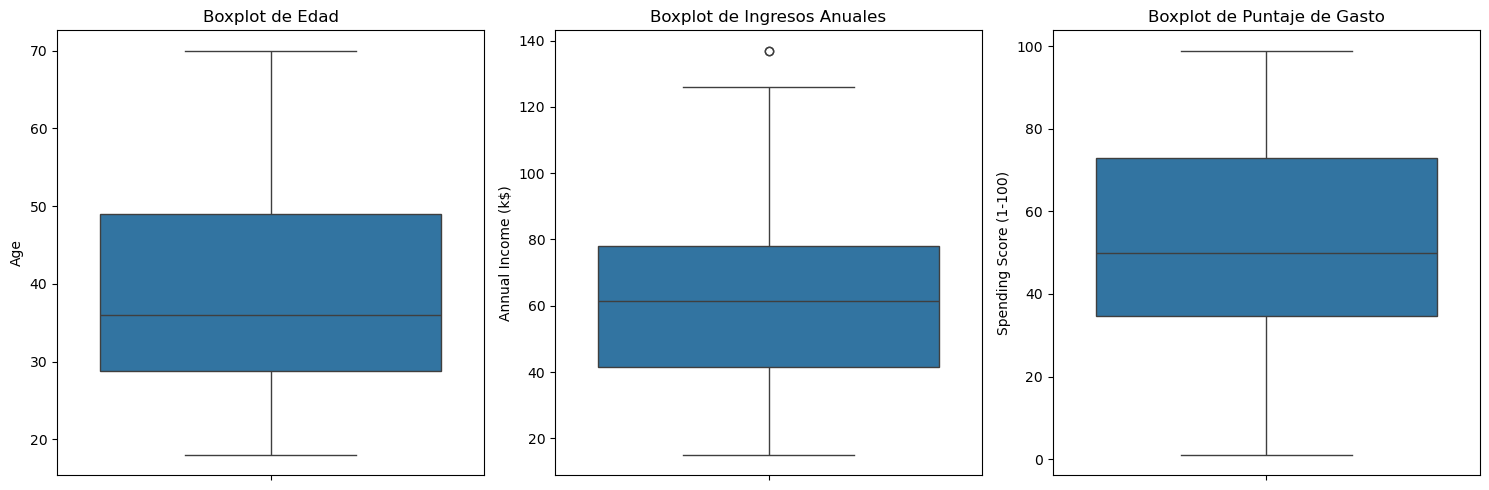

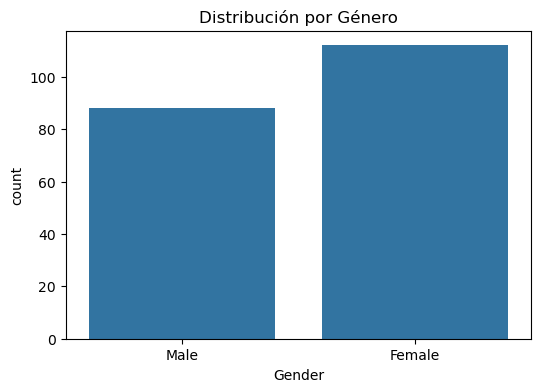

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset
data = pd.read_csv('C:/Users/BYRON/Desktop/UNIVERSIDAD/Mall_Customers.csv')

# 1. Resumen inicial del dataset
print("Información del dataset:")
print(data.info())
print("\nPrimeras 5 filas:")
print(data.head())
print("\nResumen estadístico:")
print(data.describe())

# 2. Verificar valores nulos
print("\nValores nulos por columna:")
print(data.isnull().sum())

# 3. Distribución de variables numéricas
plt.figure(figsize=(15, 5))

# Distribución de Age
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Distribución de Edad')

# Distribución de Annual Income
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Distribución de Ingresos Anuales')

# Distribución de Spending Score
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Distribución de Puntaje de Gasto')

plt.tight_layout()
plt.show()

# 4. Análisis de correlaciones entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# 5. Relación entre variables numéricas (scatter plots)
plt.figure(figsize=(15, 5))

# Edad vs Puntaje de Gasto
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Edad vs Puntaje de Gasto')

# Ingresos Anuales vs Puntaje de Gasto
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Ingresos Anuales vs Puntaje de Gasto')

plt.tight_layout()
plt.show()

# 6. Análisis de valores atípicos con boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'])
plt.title('Boxplot de Edad')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual Income (k$)'])
plt.title('Boxplot de Ingresos Anuales')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Spending Score (1-100)'])
plt.title('Boxplot de Puntaje de Gasto')

plt.tight_layout()
plt.show()

# 7. Distribución por género
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Distribución por Género')
plt.show()

Valores nulos por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


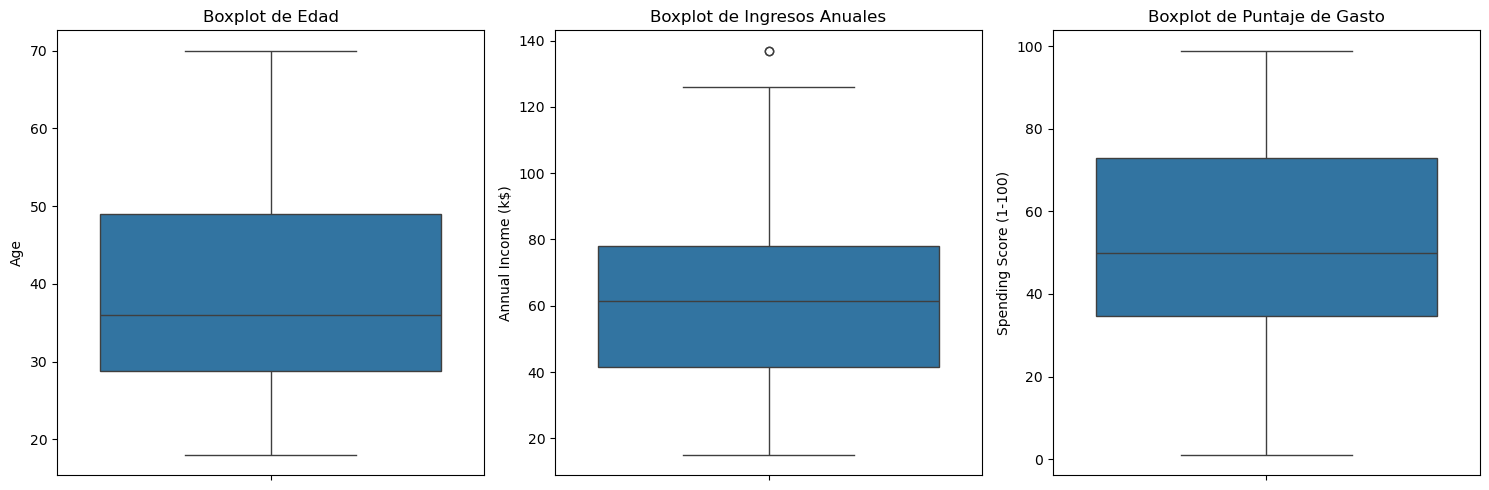


Primeras 5 filas de los datos escalados:
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


In [13]:
# 1. Verificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

# 2. Eliminar columna irrelevante
data_cleaned = data.drop(columns=['CustomerID'])

# 3. Codificar la variable categórica 'Gender'
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])  # Male=0, Female=1

# 4. Verificar valores atípicos nuevamente con boxplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=data_cleaned['Age'])
plt.title('Boxplot de Edad')

plt.subplot(1, 3, 2)
sns.boxplot(y=data_cleaned['Annual Income (k$)'])
plt.title('Boxplot de Ingresos Anuales')

plt.subplot(1, 3, 3)
sns.boxplot(y=data_cleaned['Spending Score (1-100)'])
plt.title('Boxplot de Puntaje de Gasto')

plt.tight_layout()
plt.show()

# 5. Seleccionar variables para el clustering
# Opción 1: Usar solo 'Annual Income' y 'Spending Score'
X = data_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# Opción 2: Incluir 'Age' (descomentar si se desea usar)
# X = data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Opción 3: Incluir 'Gender' (descomentar si se desea usar)
# X = data_cleaned[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 6. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Convertir a DataFrame para visualización (opcional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nPrimeras 5 filas de los datos escalados:")
print(X_scaled_df.head())

# 8. Guardar los datos preprocesados (opcional)
X_scaled_df.to_csv('Mall_Customers_Preprocessed.csv', index=False)

Varianza de las variables:
Gender                      0.247638
Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64


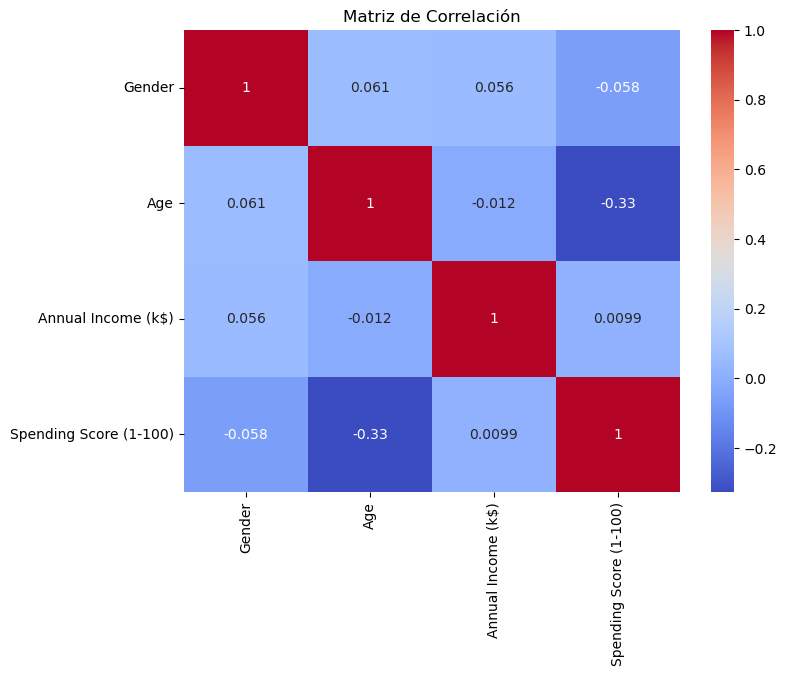


Silhouette Score por combinación de características:
                                             Features  Silhouette Score
0                                           (Gender,)          1.000000
6                    (Gender, Spending Score (1-100))          0.610791
3                           (Spending Score (1-100),)          0.610347
4                                       (Gender, Age)          0.598414
1                                              (Age,)          0.581733
9        (Annual Income (k$), Spending Score (1-100))          0.554657
2                               (Annual Income (k$),)          0.545415
5                        (Gender, Annual Income (k$))          0.537995
11              (Gender, Age, Spending Score (1-100))          0.453738
8                       (Age, Spending Score (1-100))          0.410278
13  (Age, Annual Income (k$), Spending Score (1-100))          0.408469
12  (Gender, Annual Income (k$), Spending Score (1...          0.401874
7         

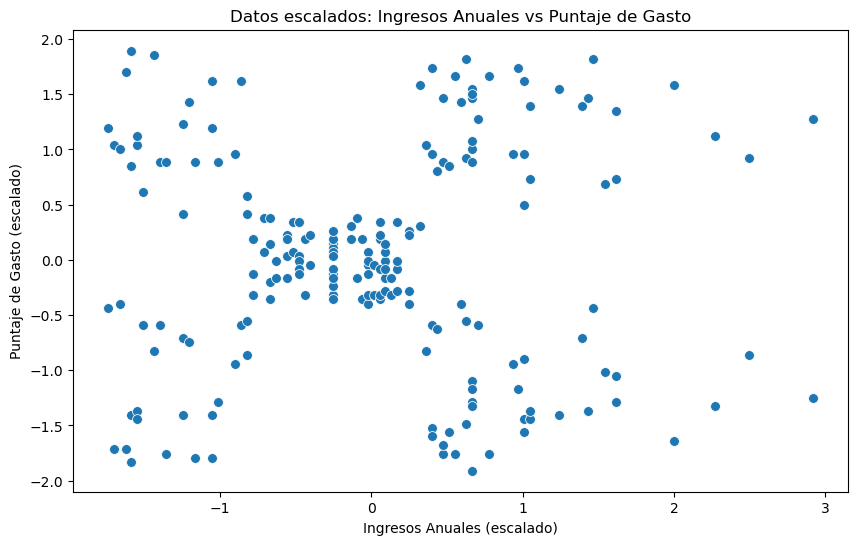

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento
# 1. Eliminar columna irrelevante
data_cleaned = data.drop(columns=['CustomerID'])

# 2. Codificar 'Gender'
label_encoder = LabelEncoder()
data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])  # Male=0, Female=1

# 3. Verificar varianza de las variables
print("Varianza de las variables:")
print(data_cleaned[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].var())

# 4. Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# 5. Selección de características basada en Silhouette Score
# Definir combinaciones de características
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
feature_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations.extend(combinations(features, r))

# Escalar los datos y evaluar Silhouette Score para cada combinación
results = []
scaler = StandardScaler()
k = 5  # Número de clústeres (basado en el método del codo previo)

for combo in feature_combinations:
    # Seleccionar las columnas
    X = data_cleaned[list(combo)]
    
    # Escalar los datos
    X_scaled = scaler.fit_transform(X)
    
    # Aplicar K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    # Calcular Silhouette Score
    score = silhouette_score(X_scaled, labels)
    results.append({'Features': combo, 'Silhouette Score': score})

# Mostrar resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)
print("\nSilhouette Score por combinación de características:")
print(results_df)

# 6. Seleccionar las mejores características
# Elegimos 'Annual Income (k$)' y 'Spending Score (1-100)' (basado en EDA y Silhouette Score)
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data_cleaned[selected_features]
X_scaled = scaler.fit_transform(X)

# 7. Visualizar datos seleccionados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], s=50)
plt.xlabel('Ingresos Anuales (escalado)')
plt.ylabel('Puntaje de Gasto (escalado)')
plt.title('Datos escalados: Ingresos Anuales vs Puntaje de Gasto')
plt.show()

# 8. Guardar datos seleccionados (opcional)
pd.DataFrame(X_scaled, columns=selected_features).to_csv('Mall_Customers_Selected_Features.csv', index=False)

Text(0.5, 1.0, 'Método del Codo')

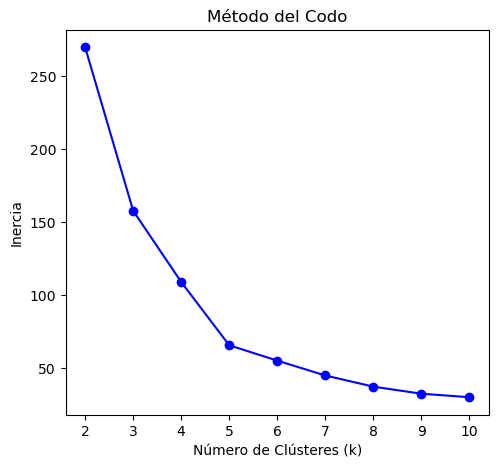

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preprocesamiento
# 1. Seleccionar características relevantes
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# 2. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Método del codo para determinar el número óptimo de clústeres
inertia = []
silhouette_scores = []
K = range(2, 11)  # Probar k de 2 a 10

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

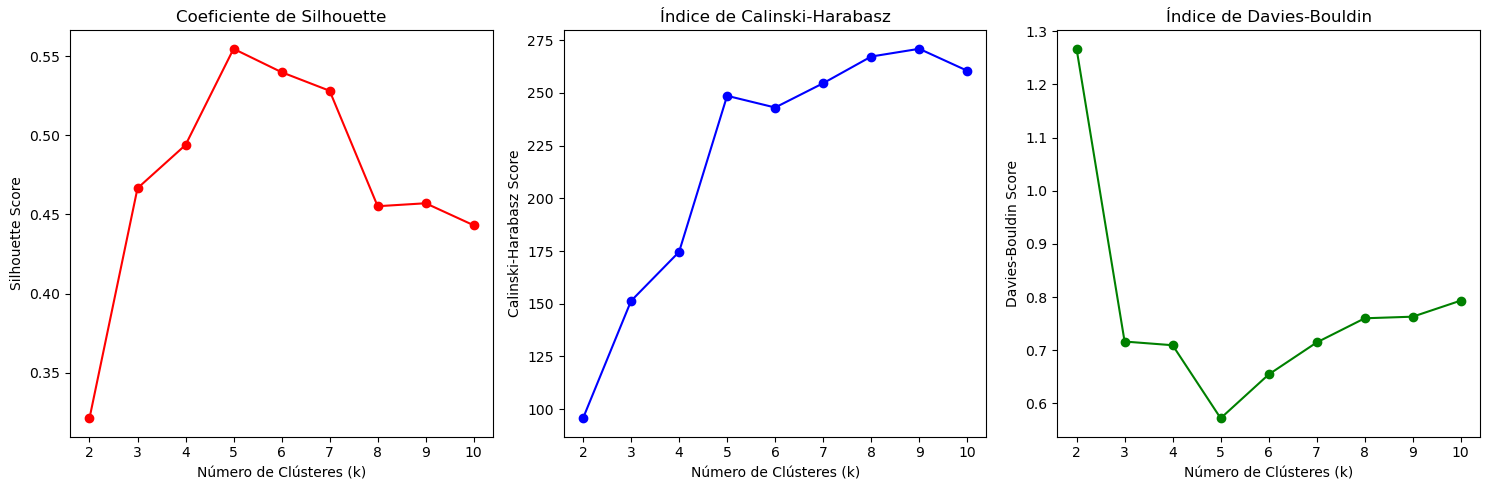


Métricas para k=5:
Silhouette Score: 0.555
Calinski-Harabasz Score: 248.649
Davies-Bouldin Score: 0.572


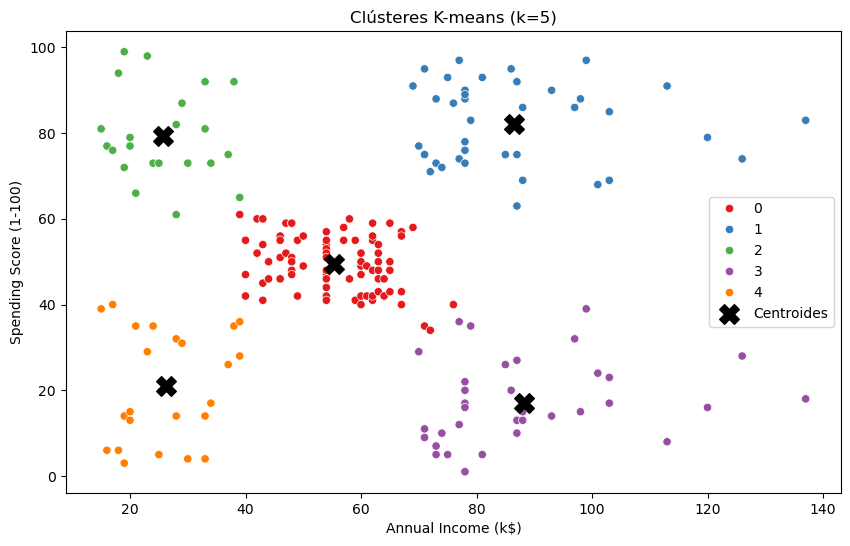


Resumen de los clústeres:
         Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                   
0                 55.296296               49.518519     81
1                 86.538462               82.128205     39
2                 25.727273               79.363636     22
3                 88.200000               17.114286     35
4                 26.304348               20.913043     23


In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento
# Seleccionar características
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar métricas para diferentes valores de k
K = range(2, 11)
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    
    # Calcular métricas
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)
    
    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Graficar métricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silhouette')

plt.subplot(1, 3, 2)
plt.plot(K, calinski_scores, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Índice de Calinski-Harabasz')

plt.subplot(1, 3, 3)
plt.plot(K, davies_scores, 'go-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Índice de Davies-Bouldin')

plt.tight_layout()
plt.show()

# Entrenar el modelo con k=5 (mejor configuración)
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_

# Calcular métricas para k=5
silhouette_k5 = silhouette_score(X_scaled, kmeans.labels_)
calinski_k5 = calinski_harabasz_score(X_scaled, kmeans.labels_)
davies_k5 = davies_bouldin_score(X_scaled, kmeans.labels_)

print(f"\nMétricas para k=5:")
print(f"Silhouette Score: {silhouette_k5:.3f}")
print(f"Calinski-Harabasz Score: {calinski_k5:.3f}")
print(f"Davies-Bouldin Score: {davies_k5:.3f}")

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual Income (k$)', 
    y='Spending Score (1-100)', 
    hue='Cluster', 
    palette='Set1', 
    data=data
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], 
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], 
    s=200, c='black', marker='X', label='Centroides'
)
plt.title('Clústeres K-means (k=5)')
plt.legend()
plt.show()

# Resumen de los clústeres
print("\nResumen de los clústeres:")
cluster_summary = data.groupby('Cluster')[selected_features].mean()
cluster_summary['Count'] = data['Cluster'].value_counts()
print(cluster_summary)

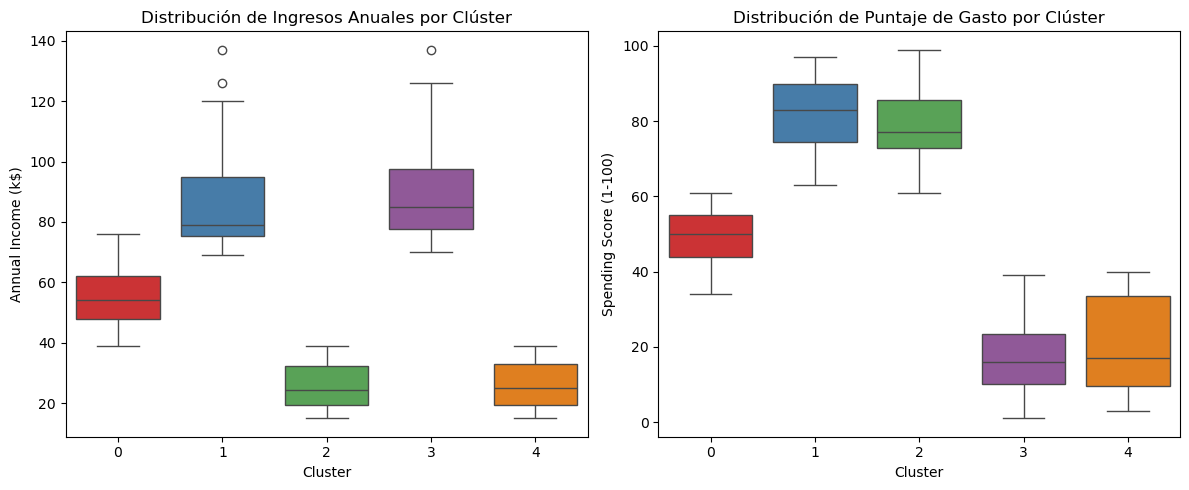

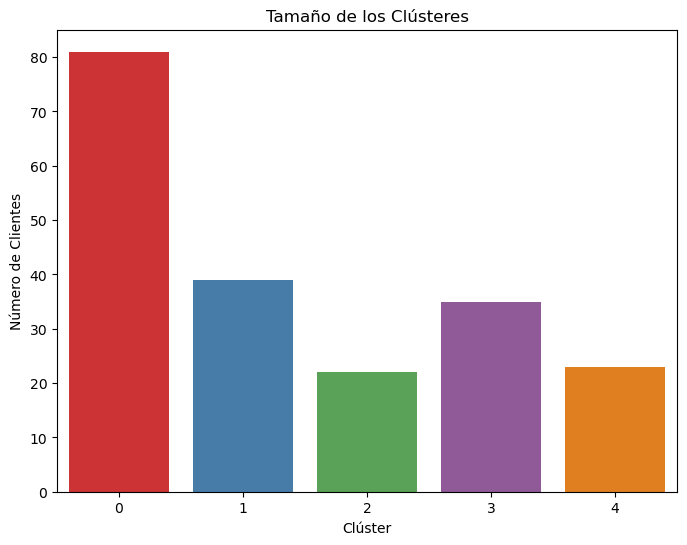

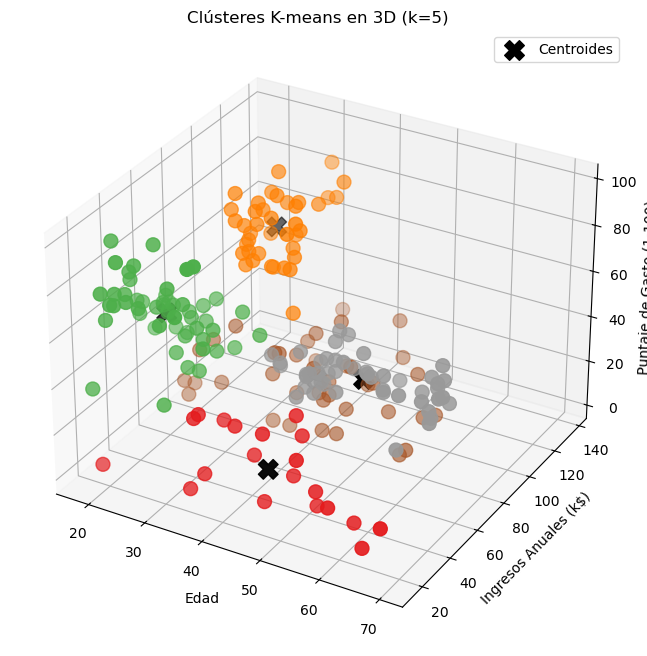


Resumen de los clústeres (2D):
         Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                   
0                 55.296296               49.518519     81
1                 86.538462               82.128205     39
2                 25.727273               79.363636     22
3                 88.200000               17.114286     35
4                 26.304348               20.913043     23

Resumen de los clústeres (3D, incluyendo Age):
                  Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster_3D                                                              
0           46.250000           26.750000               18.350000     20
1           25.185185           41.092593               62.240741     54
2           32.875000           86.100000               81.525000     40
3           39.871795           86.102564               19.358974     39
4           55.638298           54.382979               48.851064    

In [59]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Preprocesamiento
# Seleccionar características
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar K-means con k=5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_


# 1. Boxplots por clúster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=data, palette='Set1')
plt.title('Distribución de Ingresos Anuales por Clúster')

plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=data, palette='Set1')
plt.title('Distribución de Puntaje de Gasto por Clúster')

plt.tight_layout()
plt.show()

# 2. Gráfico de barras de tamaño de clústeres
cluster_sizes = data['Cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='Set1')
plt.xlabel('Clúster')
plt.ylabel('Número de Clientes')
plt.title('Tamaño de los Clústeres')
plt.show()

# 3. Gráfico 3D (opcional, incluyendo Age)
# Seleccionar características con Age
selected_features_3d = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_3d = data[selected_features_3d]
X_3d_scaled = scaler.fit_transform(X_3d)

# Entrenar K-means para 3D
kmeans_3d = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_3d.fit(X_3d_scaled)
data['Cluster_3D'] = kmeans_3d.labels_

# Visualización 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data['Age'], 
    data['Annual Income (k$)'], 
    data['Spending Score (1-100)'], 
    c=data['Cluster_3D'], 
    cmap='Set1', 
    s=100
)
ax.scatter(
    scaler.inverse_transform(kmeans_3d.cluster_centers_)[:, 0], 
    scaler.inverse_transform(kmeans_3d.cluster_centers_)[:, 1], 
    scaler.inverse_transform(kmeans_3d.cluster_centers_)[:, 2], 
    s=200, c='black', marker='X', label='Centroides'
)
ax.set_xlabel('Edad')
ax.set_ylabel('Ingresos Anuales (k$)')
ax.set_zlabel('Puntaje de Gasto (1-100)')
plt.title('Clústeres K-means en 3D (k=5)')
plt.legend()
plt.show()

# Resumen de los clústeres
print("\nResumen de los clústeres (2D):")
cluster_summary = data.groupby('Cluster')[selected_features].mean()
cluster_summary['Count'] = data['Cluster'].value_counts()
print(cluster_summary)

print("\nResumen de los clústeres (3D, incluyendo Age):")
cluster_summary_3d = data.groupby('Cluster_3D')[selected_features_3d].mean()
cluster_summary_3d['Count'] = data['Cluster_3D'].value_counts()
print(cluster_summary_3d)